# 1. Introductory part of the project

# 1.1 About

Suicide is an important social problem that requires investigation of various aspects. In this study, we will try to analyze some classical and philistine sociological (theory of human life value), economic (suicide as an inability to feed oneself), physiological (suicide caused by depression associated with vitamin D deficiency) theories of suicide as a social phenomenon. In this study, the emphasis is not on individual factors, but on structural determinants. That is, the research question is not "Why did a person commit suicide?", but "Why is suicide common in this region?".

We used different demographic data for the 50 US states. In some cases where we were not able to fit data for 2020 (as was the case with religions and the political landscape), data were taken for the coming years. More about this in the part of the project devoted to self-criticism.

# 1.2 Install dependencies


In [ ]:
!apt update
!apt install chromium-chromedriver
!pip install --upgrade selenium geopandas
!rm -rf /usr/bin/chromedriver
!rm -rf google-chrome-stable_current_amd64.deb
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://dl.google.com/linux/chrome/deb stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 336 kB in 1s (227 kB/s)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
37 packages

# 1.3 Connect the libraries

In [ ]:
import time
import re

import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

# 2. Data capture

#2.1 Initialize and populate a table with all state data

In [ ]:
# List of state names
statesFullList = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 
    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
    'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
    'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 
    'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# List of state abbreviations
statesShortList = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

# Convert short names to full names and vice versa
statesDict = dict(zip(
    statesFullList + statesShortList,
    statesShortList + statesFullList
))

Initialize driver for scraping and downloading tables

In [ ]:
# Connecting the Chrome engine
options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument('no-sandbox')
options.add_argument('disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

Prepare url-s for data processing

In [ ]:
suicideURL = 'https://www.cdc.gov/nchs/' \
    + 'pressroom/sosmap/suicide-mortality/suicide.htm'

homicideURL = 'https://www.cdc.gov/nchs/' \
    + 'pressroom/sosmap/homicide_mortality/homicide.htm'

nomGDPURL = 'https://apps.bea.gov/itable/' \
    + '?ReqID=70&step=1#eyJhcHBpZCI6NzAsInN0ZXBzIjpbMSwyNCwyOSwyNSwzMSwyNiwy' \
    + 'NywzMF0sImRhdGEiOltbIlRhYmxlSWQiLCI1MDUiXSxbIkNsYXNzaWZpY2F0aW9uIiwiT' \
    + 'kFJQ1MiXSxbIk1ham9yX0FyZWEiLCIwIl0sWyJTdGF0ZSIsWyIwIl1dLFsiQXJlYSIsWy' \
    + 'JYWCJdXSxbIlN0YXRpc3RpYyIsWyIxIl1dLFsiVW5pdF9vZl9tZWFzdXJlIiwiTGV2ZWx' \
    + 'zIl0sWyJZZWFyIixbIjIwMjAiXV0sWyJZZWFyQmVnaW4iLCItMSJdLFsiWWVhcl9FbmQi' \
    + 'LCItMSJdXX0='

realGDPURL = 'https://apps.bea.gov/itable/' \
    + '?ReqID=70&step=1#eyJhcHBpZCI6NzAsInN0ZXBzIjpbMSwyNCwyOSwyNSwzMSwyNiwy' \
    + 'NywzMF0sImRhdGEiOltbIlRhYmxlSWQiLCI1MTIiXSxbIkNsYXNzaWZpY2F0aW9uIiwiT' \
    + 'kFJQ1MiXSxbIk1ham9yX0FyZWEiLCIwIl0sWyJTdGF0ZSIsWyIwIl1dLFsiQXJlYSIsWy' \
    + 'JYWCJdXSxbIlN0YXRpc3RpYyIsWyIxIl1dLFsiVW5pdF9vZl9tZWFzdXJlIiwiTGV2ZWx' \
    + 'zIl0sWyJZZWFyIixbIjIwMjAiXV0sWyJZZWFyQmVnaW4iLCItMSJdLFsiWWVhcl9FbmQi' \
    + 'LCItMSJdXX0='

religionImportanceURL = 'https://www.pewresearch.org/' \
    + 'religion/religious-landscape-study/state/#social-and-political-views'

religionUnaffiliatedURL = 'https://www.pewresearch.org/religion/' \
    + 'religious-landscape-study/compare/religious-tradition/by/state/'

religionURL = 'https://www.pewresearch.org/' \
    + 'religion/religious-landscape-study/christians/christian/'

politicalURL = 'https://www.pewresearch.org/religion/' \
    + 'religious-landscape-study/compare/political-ideology/by/state/'

urbanizationURL = 'https://en.wikipedia.org/wiki/' \
    + 'Urbanization_in_the_United_States'

territoryURL = 'https://en.wikipedia.org/wiki/' \
    + 'List_of_U.S._states_and_territories_by_area#cite_note-2010census-2'

sunshineURL = 'https://www.currentresults.com/' \
    + 'Weather/US/average-annual-state-sunshine.php'

## 2.2 Download and process .csv-tables

Suicide rate table

In [ ]:
# Go to the desired page
driver.get(suicideURL)
time.sleep(4)
# Click on the "Download" button
driver.find_element(By.CSS_SELECTOR, '[download="data-table.csv"]').click()
time.sleep(3)

# Import the downloaded table into pandas and edit it for the convenience 
# of working with it
suicideRate = pd.read_csv('data-table.csv')
suicideRate = suicideRate.rename(columns={
    'STATE': 'state', 
    'RATE': 'suicide_rate', 
    'DEATHS':'suicide_deaths'
})
suicideRate = suicideRate[suicideRate['YEAR'] == 2020]
suicideRate = suicideRate[['state', 'suicide_rate', 'suicide_deaths']]

suicideRate['suicide_rate'] /= 100_000
suicideRate = suicideRate.set_index('state')
print(suicideRate)

       suicide_rate suicide_deaths
state                             
AL         0.000160            793
AK         0.000275            204
AZ         0.000176           1363
AR         0.000190            583
CA         0.000100           4144
CO         0.000215           1302
CT         0.000093            364
DE         0.000123            124
FL         0.000132           3135
GA         0.000137           1491
HI         0.000129            184
ID         0.000232            419
IL         0.000105           1362
IN         0.000150           1024
IA         0.000180            552
KS         0.000184            531
KY         0.000177            801
LA         0.000137            642
ME         0.000164            234
MD         0.000092            585
MA         0.000084            618
MI         0.000140           1444
MN         0.000131            758
MS         0.000139            410
MO         0.000182           1125
MT         0.000261            300
NE         0.000149 

Homicide rate table

In [ ]:
# Go to the desired page
driver.get(homicideURL)
time.sleep(4)
# Click on the "Download" button
driver.find_element(By.CSS_SELECTOR,'[download="data-table.csv"]').click()
time.sleep(3)

# Import the downloaded table into pandas and edit it for the convenience 
# of working with it
homicideRate = pd.read_csv('data-table.csv')
homicideRate = homicideRate.rename(columns={
    'STATE': 'state', 
    'RATE': 'homicide_rate', 
    'DEATHS': 'homicide_deaths'
})
homicideRate = homicideRate[homicideRate['YEAR'] == 2020]
homicideRate = homicideRate[['state', 'homicide_rate', 'homicide_deaths']]
homicideRate['homicide_rate'] /= 100_000
homicideRate = homicideRate.set_index('state')
print(homicideRate)

       homicide_rate homicide_deaths
state                               
AL          0.000142             654
AK          0.000073              55
AZ          0.000075             525
AR          0.000130             371
CA          0.000061            2368
CO          0.000058             336
CT          0.000046             152
DE          0.000099              86
FL          0.000078            1530
GA          0.000105            1093
HI          0.000033              46
ID          0.000025              42
IL          0.000112            1353
IN          0.000097             620
IA          0.000036             106
KS          0.000070             195
KY          0.000095             404
LA          0.000199             873
ME          0.000016              21
MD          0.000114             649
MA          0.000027             183
MI          0.000087             811
MN          0.000036             198
MS          0.000205             576
MO          0.000140             803
M

Racial composition table

In [ ]:
!gdown https://drive.google.com/uc?id=120_c-imR1G4OMdJMokkUODeJ2yxLfFSF
# Import the table into pandas from the downloaded file 
raceRate = pd.read_csv('raceRate2020.csv').set_index('state')
 
# And calculate the percentage of the population of different race
raceRate['white_population_rate'] = raceRate['white'] / raceRate['population']
raceRate['black_population_rate'] = raceRate['black'] / raceRate['population']
raceRate['hispanic_population_rate'] = (raceRate['hispanic'] /
                                        raceRate['population'])
raceRate['asian_population_rate'] = raceRate['asian'] / raceRate['population']
print(raceRate)

Downloading...
From: https://drive.google.com/uc?id=120_c-imR1G4OMdJMokkUODeJ2yxLfFSF
To: /content/raceRate2020.csv
100% 2.04k/2.04k [00:00<00:00, 11.0MB/s]
       population     white    black  hispanic    asian  \
state                                                     
AL        5024185   3171301  1350176    264029   100486   
AK         733058    421621    31842     49783    70735   
AZ        7151464   3816540   394264   2192224   335673   
AR        3011480   2063525   487991    256841    80182   
CA       39537251  13714234  2527175  15579278  6827772   
CO        5773713   3760658   283287   1263389   275143   
CT        3605862   2279194   410050    623271   198086   
DE         989948    579853   233774    104289    49002   
FL       21536045  11099881  3402765   5696162   781891   
GA       10711773   5362101  3455449   1123422   545396   
HI        1455086    314267    39422    138901   932677   
ID        1839098   1450515    24336    239408    49438   
IL       12812345

Table of nominal GDP

In [ ]:
# Go to the desired page
driver.get(nomGDPURL)
time.sleep(2)

# Download the table by successively pressing two buttons
driver.find_element(By.ID, 'DownloadTableBtn').click()
driver.find_element(
    By.CSS_SELECTOR, 
    '[onclick="iTable.DoDownload(\'csv\'); return none;"]'
).click()
time.sleep(3)

# Remove extra lines from the downloaded table
with open('Table.csv', 'r') as f:
    lines = [line.rstrip('\n') for line in f]
with open('Table.csv', 'w') as f:
    f.write('\n'.join(lines[3:-4]))

# Import the downloaded table into pandas and edit it for the convenience 
# of working with it
nomGDP = pd.read_csv('Table.csv')
nomGDP = nomGDP.rename(columns={
    'GeoName': 'state', 
    '2020': 'nominal_gdp'
})
nomGDP = nomGDP[['state', 'nominal_gdp']][nomGDP['state'].isin(statesFullList)]
nomGDP['state'] = nomGDP['state'].apply(lambda state: statesDict[state]) 
nomGDP = nomGDP.set_index('state')
# And calculate GDP per capita
nomGDP['nominal_gdp_per_capita'] = (nomGDP['nominal_gdp'] /
                                    raceRate['population'])
print(nomGDP)

       nominal_gdp  nominal_gdp_per_capita
state                                     
AL        230892.1                0.045956
AK         50475.2                0.068856
AZ        382072.3                0.053426
AR        133969.1                0.044486
CA       3020173.4                0.076388
CO        391263.3                0.067766
CT        276223.3                0.076604
DE         75818.6                0.076588
FL       1116726.8                0.051854
GA        625425.7                0.058387
HI         82535.5                0.056722
ID         85927.8                0.046723
IL        856942.9                0.066884
IN        373781.6                0.055086
IA        196982.9                0.061743
KS        177580.9                0.060446
KY        216865.6                0.048132
LA        232527.8                0.049926
ME         70740.0                0.051926
MD        410931.0                0.066525
MA        585150.3                0.083239
MI        5

Table of real GDP

In [ ]:
# Go to the desired page
driver.get(realGDPURL)
time.sleep(2)

# Download the table by successively pressing two buttons
driver.find_element(By.ID, 'DownloadTableBtn').click()
driver.find_element(By.CSS_SELECTOR,
'[onclick="iTable.DoDownload(\'csv\'); return none;"]').click()
time.sleep(3)

# Remove extra lines from the downloaded table
with open('Table.csv', 'r') as f:
    lines = [line.rstrip('\n') for line in f]
with open('Table.csv', 'w') as f:
    f.write('\n'.join(lines[3:-4]))

# Import the downloaded table into pandas and edit it for the convenience 
# of working with it
realGDP = pd.read_csv('Table.csv')
realGDP = realGDP.rename(columns={
    'GeoName': 'state', 
    '2020': 'real_gdp'
})
realGDP = realGDP[['state', 'real_gdp']][realGDP['state'].isin(statesFullList)]
realGDP['state'] = realGDP['state'].apply(lambda state: statesDict[state]) 
realGDP = realGDP.set_index('state')

# And calculate GDP per capita
realGDP['real_gdp_per_capita'] = realGDP['real_gdp'] / raceRate['population']
print(realGDP)

        real_gdp  real_gdp_per_capita
state                                
AL      199880.8             0.039784
AK       50705.2             0.069169
AZ      327178.0             0.045750
AR      117268.2             0.038940
CA     2667220.9             0.067461
CO      353345.2             0.061199
CT      235234.9             0.065237
DE       62281.8             0.062914
FL      950164.4             0.044120
GA      537615.8             0.050189
HI       70109.4             0.048182
ID       75145.5             0.040860
IL      734385.0             0.057319
IN      327277.9             0.048232
IA      170957.4             0.053586
KS      158348.3             0.053899
KY      188396.3             0.041813
LA      218421.7             0.046897
ME       59881.4             0.043955
MD      352384.0             0.057047
MA      500001.0             0.071126
MI      448455.3             0.044503
MN      328489.5             0.057565
MS      100526.9             0.033947
MO      2827

Unemployment share table

In [ ]:
!gdown https://drive.google.com/uc?id=1hhGxnzh26-E3ohHKp35sZsBp29mXtLjf
# Import table into pandas from downloaded file
unemploymentRate = pd.read_csv('unemploymentRate2020.csv').set_index('state')
print(unemploymentRate)

Downloading...
From: https://drive.google.com/uc?id=1hhGxnzh26-E3ohHKp35sZsBp29mXtLjf
To: /content/unemploymentRate2020.csv
100% 429/429 [00:00<00:00, 2.63MB/s]
       unemployment_rate
state                   
AL                   6.4
AK                   8.3
AZ                   7.8
AR                   6.2
CA                  10.1
CO                   6.8
CT                   7.9
DE                   7.5
FL                   8.1
GA                   6.5
HI                  11.7
ID                   5.5
IL                   9.3
IN                   7.3
IA                   5.2
KS                   5.8
KY                   6.5
LA                   8.6
ME                   5.1
MD                   6.5
MA                   9.4
MI                  10.0
MN                   6.3
MS                   8.0
MO                   6.1
MT                   5.8
NE                   4.3
NV                  13.5
NH                   6.7
NJ                   9.4
NM                   7.9
NY            

## 2.3. Scrap the rest of the data


Initialize dictionaries with data for tables

In [ ]:
# Religion rate variables
religionRateDict = {
    'state': statesShortList,
    'very_important_rate': [],
    'somewhat_important_rate': [],
    'not_important_rate': [],
    'christian_rate': [],
    'non-christian_rate': [],
    'unaffiliated_rate': []
}


# Political ideology rate variables
politicalRateDict = {
    'state': statesShortList,
    'conservative_rate': [],
    'moderate_rate': [],
    'liberal_rate': [],
    'neutral_rate': []
}


# Urbanization rate variables
urbanizationRateDict = {
    'state': statesShortList,
    'urban_rate': []
}


# Territory area variables
territoryAreaDict = {
    'state': statesShortList,
    'area': []
}


# Sunshine days rate variables
sunshineRateDict = {
    'state': statesShortList,
    'sun_rate': [],
    'sun_total_hours': []
}

In [ ]:
# Define a function that converts a fraction expressed as 
# a percentage to a decimal fraction
def percent_to_float(percent):
    """Conversion: percent (string) -> rate (float)"""
    if percent.endswith('%'):
        return float(percent[:-1]) / 100
    return float(percent) / 100
# Define a function that converts a number expressed using 
# comma-separated text to a numeric type
def string_to_float(num_str):
    num_str = num_str.replace(',', '')
    return float(num_str)

Scraping the importance of religion data

In [ ]:
# Scrapping religion importance rate values from pewsearch.org
driver.get(religionImportanceURL)
driver.find_element(
    By.CSS_SELECTOR, 
    '[data-tab="571df069787c6d4410847a0fbb93e91d-table"]'
).click()
time.sleep(2)
section = driver.find_element(By.ID, 'importance-of-religion-in-ones-life')

tableDataRaw = section.find_element(By.TAG_NAME, 'tbody') \
    .find_elements(By.TAG_NAME, 'tr')

for tableRow in tableDataRaw:
    curColumn = tableRow.find_elements(By.TAG_NAME, 'td')
    
    if len(curColumn) == 0:
        continue

    # Check if the data is state-wide and not country-wide
    stateName = curColumn[0].text

    if stateName not in statesFullList:
        continue

    religionRateDict['very_important_rate'] \
        .append((
            stateName,
            percent_to_float(curColumn[1].text)
        ))
    religionRateDict['somewhat_important_rate'] \
        .append((
            stateName,
            percent_to_float(curColumn[2].text) \
            + percent_to_float(curColumn[3].text)
        ))
    religionRateDict['not_important_rate'] \
        .append((
            stateName,
            percent_to_float(curColumn[4].text)
        ))

religionRateDict['very_important_rate'] = \
    [rate for (_, rate) in sorted(religionRateDict['very_important_rate'])]
religionRateDict['somewhat_important_rate'] = \
    [rate for (_, rate) in sorted(religionRateDict['somewhat_important_rate'])]
religionRateDict['not_important_rate'] = \
    [rate for (_, rate) in sorted(religionRateDict['not_important_rate'])]

Scraping shares of christianity by state

In [ ]:
# Scrapping religion rate values from pewsearch.org
driver.get(religionURL)
driver.find_element(By.CSS_SELECTOR, '[data-tab="state-map-table"]').click()
time.sleep(2)

tableDataRaw = driver.find_element(By.TAG_NAME, 'tbody') \
    .find_elements(By.TAG_NAME, 'tr')

for tableRow in tableDataRaw:
    curColumn = tableRow.find_elements(By.TAG_NAME, 'td')
    
    if len(curColumn) == 0:
        continue

    # Check if the data is state-wide and not country-wide
    stateName = curColumn[0].text

    if stateName not in statesFullList:
        continue
    religionRateDict['christian_rate'] \
        .append((
            stateName,
            percent_to_float(curColumn[1].text)
        ))


religionRateDict['christian_rate'] = \
    [rate for (_, rate) in sorted(religionRateDict['christian_rate'])]

Scraping the share of other religions and non-believers

In [ ]:
driver.get(religionUnaffiliatedURL)
time.sleep(2)
driver.find_element(
    By.CSS_SELECTOR, 
    '[data-tab="54dc509523535b4f5fdfe287f884ae22-table"]'
).click()
time.sleep(2)

tableDataRaw = driver.find_element(By.TAG_NAME, 'tbody') \
    .find_elements(By.TAG_NAME, 'tr')

for tableRow in tableDataRaw:
    curColumn = tableRow.find_elements(By.TAG_NAME, 'td')
    
    if len(curColumn) == 0:
        continue

    # Check if the data is state-wide and not country-wide
    stateName = curColumn[0].text

    if stateName not in statesFullList:
        continue
    religionRateDict['unaffiliated_rate'] \
        .append((
            stateName,
            percent_to_float(curColumn[15].text)
        ))


religionRateDict['unaffiliated_rate'] = \
    [rate for (_, rate) in sorted(religionRateDict['unaffiliated_rate'])]

for i in range(len(religionRateDict['unaffiliated_rate'])):
    religionRateDict['non-christian_rate'].append(
        1 - (religionRateDict['christian_rate'][i] +
            religionRateDict['unaffiliated_rate'][i])
    )

# Finally getting religion rate DataFrame
religionRate = pd.DataFrame(data=religionRateDict).set_index('state')
print(religionRate)

       very_important_rate  somewhat_important_rate  not_important_rate  \
state                                                                     
AL                    0.77                     0.19                0.04   
AK                    0.41                     0.42                0.16   
AZ                    0.51                     0.37                0.11   
AR                    0.70                     0.23                0.05   
CA                    0.47                     0.39                0.14   
CO                    0.47                     0.40                0.13   
CT                    0.42                     0.44                0.14   
DE                    0.46                     0.41                0.11   
FL                    0.53                     0.36                0.11   
GA                    0.64                     0.27                0.08   
HI                    0.44                     0.45                0.10   
ID                    0.5

Scraping statistics on political views

In [ ]:
# Scrapping political ideology values from pewsearch.org
driver.get(politicalURL)
driver.find_element(
    By.CSS_SELECTOR, 
    '[data-tab="51e56cc7e934ca51e586f1f045786c39-table"]'
).click()
time.sleep(2)

tableDataRaw = driver.find_element(By.TAG_NAME, 'tbody') \
    .find_elements(By.TAG_NAME, 'tr')

for tableRow in tableDataRaw:
    curColumn = tableRow.find_elements(By.TAG_NAME, 'td')
    
    if len(curColumn) == 0:
        continue

    # Check if the data is state-wide and not country-wide
    stateName = curColumn[0].text

    if stateName not in statesFullList:
        continue

    politicalRateDict['conservative_rate'] \
        .append((
            stateName,
            percent_to_float(curColumn[1].text)
        ))
    politicalRateDict['moderate_rate'] \
        .append((
            stateName,
            percent_to_float(curColumn[2].text)
        ))
    politicalRateDict['liberal_rate'] \
        .append((
            stateName,
            percent_to_float(curColumn[3].text)
        ))
    politicalRateDict['neutral_rate'] \
        .append((
            stateName,
            percent_to_float(curColumn[4].text)
        ))


politicalRateDict['conservative_rate'] = \
    [rate for (state,rate) in sorted(politicalRateDict['conservative_rate'])]
politicalRateDict['moderate_rate'] = \
    [rate for (state,rate) in sorted(politicalRateDict['moderate_rate'])]
politicalRateDict['liberal_rate'] = \
    [rate for (state,rate) in sorted(politicalRateDict['liberal_rate'])]
politicalRateDict['neutral_rate'] = \
    [rate for (state,rate) in sorted(politicalRateDict['neutral_rate'])]

# Finally getting political rate DataFrame
politicalRate = pd.DataFrame(data=politicalRateDict).set_index('state')
print(politicalRate)

       conservative_rate  moderate_rate  liberal_rate  neutral_rate
state                                                              
AL                  0.50           0.29          0.12          0.08
AK                  0.34           0.37          0.23          0.06
AZ                  0.39           0.31          0.23          0.07
AR                  0.42           0.38          0.14          0.06
CA                  0.31           0.34          0.29          0.06
CO                  0.33           0.34          0.28          0.05
CT                  0.33           0.36          0.25          0.06
DE                  0.26           0.40          0.25          0.09
FL                  0.37           0.31          0.24          0.08
GA                  0.42           0.32          0.20          0.06
HI                  0.30           0.42          0.21          0.06
ID                  0.42           0.32          0.21          0.05
IL                  0.32           0.35         

Scraping data on urbanization

In [ ]:
# Scrapping urbanization rate values from wikipedia.org
driver.get(urbanizationURL)
tableDataRaw = driver.find_elements(By.TAG_NAME, 'tr')
stateCheckPattern = re.compile('^.+?(?=\ \(|$)')

for tableRow in tableDataRaw:
    curColumn = tableRow.find_elements(By.TAG_NAME, 'td')
    
    if len(curColumn) == 0:
        continue

    # Check if the data is state-wide and not country-wide
    stateNameRaw = curColumn[0] \
        .find_element(By.TAG_NAME, 'a') \
        .get_attribute('title')
    stateName = stateCheckPattern \
        .search(stateNameRaw) \
        .group()

    if stateName not in statesFullList:
        continue
    urbanizationRateDict['urban_rate'] \
        .append(percent_to_float(curColumn[1].text))

# Finally getting urbanization rate DataFrame
urbanizationRate = pd.DataFrame(data=urbanizationRateDict).set_index('state')
urbanizationRate['rural_rate'] = 1 - urbanizationRate['urban_rate']
print(urbanizationRate)


       urban_rate  rural_rate
state                        
AL          0.577       0.423
AK          0.649       0.351
AZ          0.893       0.107
AR          0.555       0.445
CA          0.942       0.058
CO          0.860       0.140
CT          0.863       0.137
DE          0.826       0.174
FL          0.915       0.085
GA          0.741       0.259
HI          0.861       0.139
ID          0.692       0.308
IL          0.869       0.131
IN          0.712       0.288
IA          0.632       0.368
KS          0.723       0.277
KY          0.587       0.413
LA          0.715       0.285
ME          0.386       0.614
MD          0.856       0.144
MA          0.913       0.087
MI          0.735       0.265
MN          0.719       0.281
MS          0.463       0.537
MO          0.695       0.305
MT          0.534       0.466
NE          0.730       0.270
NV          0.941       0.059
NH          0.583       0.417
NJ          0.938       0.062
NM          0.745       0.255
NY        

States area data scraping

In [ ]:
# Scrapping territory area values from wikipedia.org
driver.get(territoryURL)
stateCheckPattern = re.compile('^.+?(?=\ \(|$)')

tableDataRaw = driver.find_element(By.TAG_NAME, 'tbody') \
    .find_elements(By.TAG_NAME, 'tr')

for tableRow in tableDataRaw:
    curColumn = tableRow.find_elements(By.TAG_NAME, 'th')
    
    if len(curColumn) == 0:
        continue

    # Check if the data is state-wide and not country-wide
    stateNameRaw = curColumn[0] \
        .find_element(By.TAG_NAME, 'a') \
        .get_attribute('title')
    stateName = stateCheckPattern \
        .search(stateNameRaw) \
        .group()

    if stateName not in statesFullList:
        continue
    territoryAreaDict['area'].append((
        stateName,
        string_to_float(tableRow.find_elements(By.TAG_NAME, 'td')[2].text)
    ))


territoryAreaDict['area'] = \
    [area for (state,area) in sorted(territoryAreaDict['area'])]
# Finally getting territory rate DataFrame
territoryArea = pd.DataFrame(data=territoryAreaDict).set_index('state')
territoryArea['population_density'] = \
    raceRate['population'] / territoryArea['area']
print(territoryArea)


            area  population_density
state                               
AL      135767.0           37.005937
AK     1723337.0            0.425371
AZ      295234.0           24.223037
AR      137732.0           21.864781
CA      423967.0           93.255492
CO      269601.0           21.415770
CT       14357.0          251.157066
DE        6446.0          153.575551
FL      170312.0          126.450544
GA      153910.0           69.597641
HI       28313.0           51.392858
ID      216443.0            8.496916
IL      149995.0           85.418481
IN       94326.0           71.936105
IA      145746.0           21.889897
KS      213100.0           13.786279
KY      104656.0           43.052247
LA      135659.0           34.332223
ME       91633.0           14.867297
MD       32131.0          192.247393
MA       27336.0          257.161838
MI      250487.0           40.229884
MN      225163.0           25.343400
MS      125438.0           23.607336
MO      180540.0           34.091254
M

Scraping solar data

In [ ]:
driver.get(sunshineURL)
tbodies = driver.find_elements(By.TAG_NAME, 'tbody')

for tbody in tbodies:
    tableDataRaw = tbody.find_elements(By.TAG_NAME, 'tr')

    for tableRow in tableDataRaw:
        curColumn = tableRow.find_elements(By.TAG_NAME, 'td')
        if len(curColumn) == 0:
            continue

        # Check if the data is state-wide and not country-wide
        stateName = curColumn[0].text
        if stateName not in statesFullList:
            continue

        sunshineRateDict['sun_rate'] \
            .append((
                stateName,
                sunshineRateDict['sun_rate'][-1][1] \
                if curColumn[2].text == '–' \
                else percent_to_float(curColumn[2].text)
            ))
        sunshineRateDict['sun_total_hours'] \
            .append((
                stateName,
                sunshineRateDict['sun_total_hours'][-1][1] \
                if curColumn[3].text == '–' \
                else float(curColumn[3].text)
            ))

sunshineRateDict['sun_rate'] = \
    [rate for (_, rate) in sorted(sunshineRateDict['sun_rate'])]

sunshineRateDict['sun_total_hours'] = \
    [hours for (_, hours) in sorted(sunshineRateDict['sun_total_hours'])]

# Finally getting sunshine rate DataFrame
sunshineRate = pd.DataFrame(data=sunshineRateDict).set_index('state')
print(sunshineRate)

       sun_rate  sun_total_hours
state                           
AL         0.58           2641.0
AK         0.41           2061.0
AZ         0.85           3806.0
AR         0.61           2771.0
CA         0.68           3055.0
CO         0.71           3204.0
CT         0.56           2585.0
DE         0.56           2585.0
FL         0.66           2927.0
GA         0.66           2986.0
HI         0.71           2986.0
ID         0.64           2993.0
IL         0.56           2567.0
IN         0.55           2440.0
IA         0.59           2691.0
KS         0.65           2922.0
KY         0.56           2514.0
LA         0.57           2649.0
ME         0.57           2513.0
MD         0.57           2582.0
MA         0.58           2634.0
MI         0.51           2392.0
MN         0.58           2711.0
MS         0.61           2720.0
MO         0.60           2690.0
MT         0.59           2698.0
NE         0.61           2762.0
NV         0.79           3646.0
NH        

# 2.4. Prepare data for analysis

Combine data into a single table

In [ ]:
stateData = raceRate.merge(suicideRate, on='state') \
    .merge(homicideRate, on='state') \
    .merge(nomGDP, on='state') \
    .merge(realGDP, on='state') \
    .merge(religionRate, on='state') \
    .merge(politicalRate, on='state') \
    .merge(urbanizationRate, on='state') \
    .merge(territoryArea, on='state') \
    .merge(sunshineRate, on='state') \
    .merge(unemploymentRate, on='state')

Remove columns with demographics that are not normalized by population

In [ ]:
stateData.pop('white')
stateData.pop('black')
stateData.pop('hispanic')
stateData.pop('asian')
stateData.pop('suicide_deaths')
stateData.pop('homicide_deaths')

state
AL     654
AK      55
AZ     525
AR     371
CA    2368
CO     336
CT     152
DE      86
FL    1530
GA    1093
HI      46
ID      42
IL    1353
IN     620
IA     106
KS     195
KY     404
LA     873
ME      21
MD     649
MA     183
MI     811
MN     198
MS     576
MO     803
MT      65
NE      76
NV     217
NH      14
NJ     362
NM     216
NY     875
NC     884
ND      30
OH    1004
OK     342
OR     157
PA     994
RI      29
SC     622
SD      52
TN     753
TX    2212
UT      95
VT      14
VA     531
WA     322
WV     114
WI     334
WY      25
Name: homicide_deaths, dtype: object

Run a Friedman statistical test to see if the state difference is statistically significant.

In [ ]:
f, p = stats.friedmanchisquare(*np.array(stateData.values).T)
print ('Yes' if p < 0.005 else 'No')

Yes


Final version of the dataframe

In [ ]:
stateData

Geographical view of suicide rates

Downloading...
From: https://drive.google.com/uc?id=1OeNlUuNLOg_NL9uG8FdWlg9ujjl1IiNl
To: /content/us2020.geojson
100% 2.66M/2.66M [00:00<00:00, 53.9MB/s]


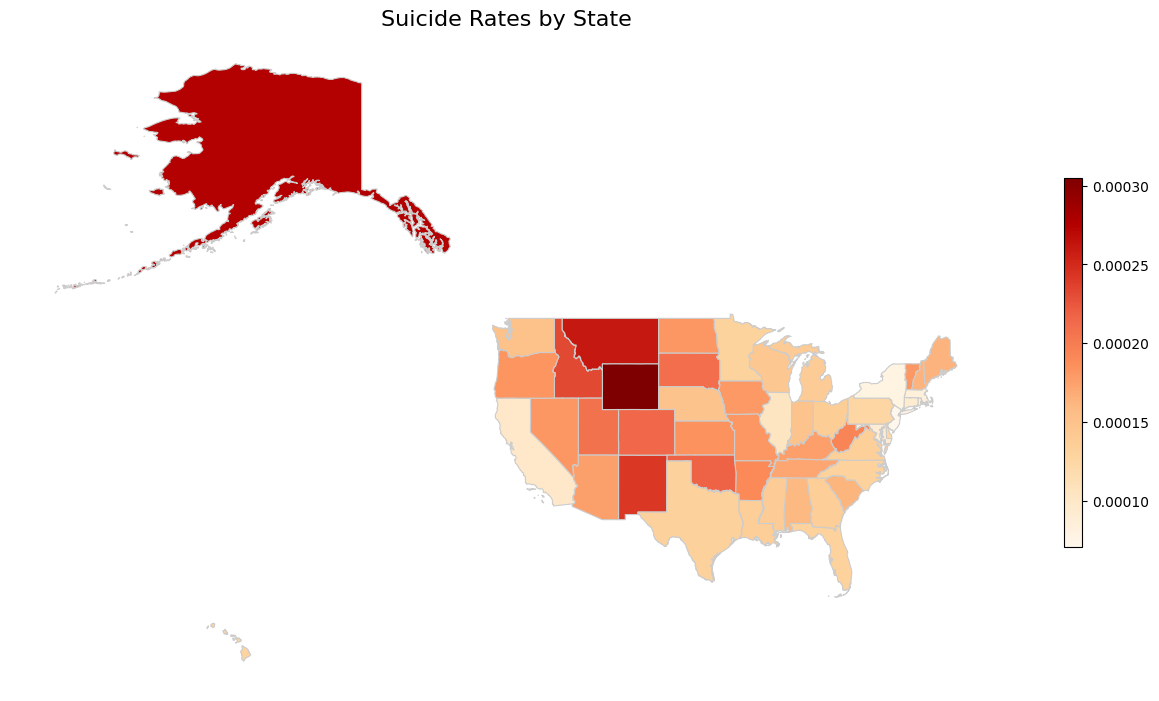

In [ ]:
!gdown https://drive.google.com/uc?id=1OeNlUuNLOg_NL9uG8FdWlg9ujjl1IiNl

statesGeoData = gpd.read_file('us2020.geojson')

# Merge the stateData dataframe's 'suicide_rate' column with the statesGeoData
# dataframe on the 'state' and 'STUSPS' columns
statesGeoData = statesGeoData.set_index('STUSPS')
statesGeoData = statesGeoData.merge(
    stateData['suicide_rate'], 
    left_on='STUSPS', 
    right_on='state'
)

# Create a figure and an axis object, set the axis off, and add a title
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_axis_off()
ax.set_title('Suicide Rates by State', fontsize=16)
statesGeoData.plot(
    column='suicide_rate', 
    cmap='OrRd', 
    linewidth=0.8, 
    ax=ax, 
    edgecolor='0.8', 
    legend=True, 
    legend_kwds={'shrink': 0.3}
)

# 3. Preparing analysis tools

Program a tool to illustrate the correlation between variables on a graph

In [ ]:
def plot_correlation(column):
    # Calculate Pearson correlation coefficient
    r = stateData['suicide_rate'].corr(stateData[column])
    # Create scatter plot with linear regression line
    sns.lmplot(x='suicide_rate', y=column, data=stateData)
    # Add Pearson correlation coefficient to plot
    plt.text(
        stateData['suicide_rate'].min(), 
        stateData[column].max(), 
        'Correlation: {:.2f}'.format(r)
    )
    # Show plot
    plt.show()

Program a tool for analyzing the strength of correlation

In [ ]:
def corr_check(r):
    r = abs(r)
    if 0 <= r <= 1:
        if r < 0.3:
            return('very weak')
        elif 0.3 <= r < 0.5:
            return('weak')
        elif 0.5 <= r < 0.7:
            return('average')
        elif 0.7 <= r < 0.9:
            return('strong')
        else:
            return('very strong')
    else:
        return('ERROR')

Program the statistical significance analysis tool

In [ ]:
def p_value_check(p):
    if p >= 0:
        if 0.01 <= p < 0.05:
            return('statistically significant')
        elif 0.01 > p:
            return('very statistically significant')
        else:
            return('statistically unsignificant')
    else:
        return('ERROR')

Program the t-test check tool

In [ ]:
def t_critical_check(p, r):
    if p >= 0 and -1 <= r <= 1:
        # Calculate the t-value for a two-tailed t-test
        n = len(stateData)
        degree_of_freedom = n - 2
        t_critical = stats.t.ppf(1 - p/2, degree_of_freedom)
        t = r * ((n-2) / ((1 - r**2)**0.5))
        # Determine if the t-value is greater than the critical value
        if abs(t) > t_critical:
            return(True)
        else: 
            return(False)
    else:
        return('ERROR')

Program a tool that calculates the main statistical indicators and, if necessary, filters out those correlations that turned out to be unimportant

In [ ]:
def analysis_list(column, filter=False):
    # Calculate Pearson correlation coefficient and p-value
    r, p = stats.pearsonr(stateData[column], stateData['suicide_rate'])
    # Determine if the correlation is statistically significant
    significance = p_value_check(p)
    # Calculate the t-value for a two-tailed t-test
    degree_of_freedom = len(stateData) - 2
    t_test = t_critical_check(p, r)
    strength = corr_check(r)
    # Statistical significance filter
    if filter == True:
        if t_test == True and \
            strength != 'very weak' and \
            significance != 'statistically unsignificant':
            return([r, r**2, p, strength, significance])
    else:
        return([r, r**2, p, strength, significance])

Indicators:
*  correlation coefficient (r)
*  determination coefficient (R)
*  p-value (P)
*  correlation strength
*  statistical significance

In [ ]:
def analyze_this(column):
    ar = analysis_list(column)
    column_1 = column
    column_1 = column.capitalize().replace("_", " ")
    print(column_1 + ' summary:')
    print('Correlation coefficient is', round(ar[0], 4))
    print('Determination coefficient is', round(ar[1], 4)) 
    print('P-value is', round(ar[2], 4))  
    print('Correlation is', ar[3]) 
    print('Correlation is', ar[4]) 
    plot_correlation(column)

# 4. Analysis

Let's create two dictionaries. In one, we save all the data, and in the second, only those that show statistically significant patterns

In [ ]:
insights = {}
full = {}
for column in stateData.columns.tolist():
    if column != 'suicide_rate':
        if analysis_list(column, True)!= None:
            insights[column] = analysis_list(column)
            full[column] = analysis_list(column)
        else:
            full[column] = analysis_list(column)

In [ ]:
for key, value in insights.items():
    print('{}: {}'.format(key, value))

population: [-0.46141030848020154, 0.21289947277179475, 0.0007445996809021158, 'weak', 'very statistically significant']
white_population_rate: [0.3446746453536321, 0.11880061114965208, 0.01423802591332206, 'weak', 'statistically significant']
black_population_rate: [-0.4532914061795735, 0.20547309891625506, 0.0009471105691989311, 'weak', 'very statistically significant']
nominal_gdp: [-0.4723592741701852, 0.2231232838945842, 0.0005332018687034512, 'weak', 'very statistically significant']
nominal_gdp_per_capita: [-0.3856172846488639, 0.14870069021996293, 0.005681643114344191, 'weak', 'very statistically significant']
real_gdp: [-0.4574525725511598, 0.2092628561336741, 0.0008378642671859441, 'weak', 'very statistically significant']
non-christian_rate: [-0.45205031709283383, 0.2043494891837316, 0.0009820794557001537, 'weak', 'very statistically significant']
conservative_rate: [0.43585898266164574, 0.1899730527668448, 0.0015568651062153223, 'weak', 'very statistically significant']
lib

Note that the characteristics that protect the state from high suicide rates are high GDP, high population density, urbanization, high non-Christian population, and high progressive population. This paints a clear picture. Apparently, the most economically developed states, in which the influence of Christianity is weaker than average, urbanization and population density are high, potentially lowering the suicide rate. Thus, we can associate conditional "progress" with a decrease in the suicide rate.

In [ ]:
for key, value in full.items():
    print('{}: {}'.format(key, value))

population: [-0.46141030848020154, 0.21289947277179475, 0.0007445996809021158, 'weak', 'very statistically significant']
white_population_rate: [0.3446746453536321, 0.11880061114965208, 0.01423802591332206, 'weak', 'statistically significant']
black_population_rate: [-0.4532914061795735, 0.20547309891625506, 0.0009471105691989311, 'weak', 'very statistically significant']
hispanic_population_rate: [-0.12217248610094153, 0.014926116360084752, 0.39799226068860377, 'very weak', 'statistically unsignificant']
asian_population_rate: [-0.23425173806000474, 0.05487387678413307, 0.10154978834330416, 'very weak', 'statistically unsignificant']
homicide_rate: [-0.03883080412347458, 0.0015078313488756506, 0.7889060743546635, 'very weak', 'statistically unsignificant']
nominal_gdp: [-0.4723592741701852, 0.2231232838945842, 0.0005332018687034512, 'weak', 'very statistically significant']
nominal_gdp_per_capita: [-0.3856172846488639, 0.14870069021996293, 0.005681643114344191, 'weak', 'very statistic

Also note which structural parameters are not important. The amount of sun does not affect which states have a higher suicide rate. Unemployment, in contrast, is a predictor of low suicide rates. Also not important is the proportion of murders (an assumption about the value of life, where both the value of one's own and someone else's life is simultaneously reduced). Among other things, it doesn't matter how rooted religion is in the state.

Let's use the tools for an example. Considering the disproportionately large size of Alaska, let's analyze the correlations for area in order to assess on the graph whether it pollutes the sample


Area summary:
Correlation coefficient is 0.4452
Determination coefficient is 0.1982
P-value is 0.0012
Correlation is weak
Correlation is very statistically significant


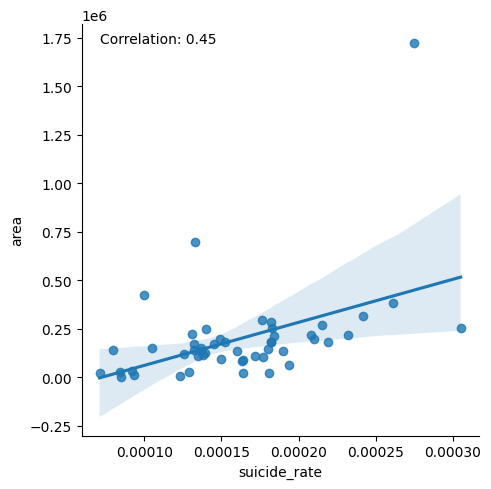

In [ ]:
analyze_this('area')

Note that the general trend would have continued without taking into account Alaska

# 5. Conclusion

## 5.1 Elements of self-criticism

As an undergraduate amateur study, this is not without its downsides.

1. Using only linear correlations.

In the case of our possession of a more advanced level of statistics, it would be worth testing various hypotheses about the statistical dependence of variables, in addition to linear.

2. Poor choice of dates.

The main body of research is selected for 2020. This is the year of the coronavirus and it can confuse various data in unpredictable ways. Among other things, statistics on religiosity and political beliefs are taken from 2014, which precedes the era of political and partly religious polarization during the Trump presidency.


3. Static.

To improve the quality of the study, it would be worthwhile (despite strong economic, cultural and territorial similarities) to collect time series with data for different states, at least for 10 years, in order to be able not only to analyze the difference between states (on different samples), but also within the state (multiple times in one sample).

## 5.2 Discarded doxes

1. The religiosity of a state has nothing to do with its suicide rate.

2. Sun levels associated with less depression, for some reason, do not affect suicide rates in the state.

Perhaps this is due to the fact that the US climate is not sufficiently variable. This needs further clarification

3. High unemployment doesn't lead to high suicide rates

For some unknown reason, on the contrary, high unemployment in the state is associated with low suicide rates.

4. The hypothesis of a single value of life (the connection between suicides and murders) was not confirmed

## 5.3 Positive insights

Economic and scientific progress (or rather what we associate with these concepts: GDP, urbanization, political progressivism, religious tolerance) brings a decrease in the level of suicide. The hypothesis requires further reflection.

Note that the project already contains a set of ready-made analysis tools (analyze_this, analysis_list, plot_correlation), so in fact, in addition to new data, it requires only minor technical refinement.

## 5.4 Possible expansion of the study

1. Take dynamic statistics over time for 10-15 years.
2. Increase the number of demographic indicators (IQ, average and median salary, average vacations, the number of "strong" and "weak" social ties, the number of divorces, the cost of the CHI policy, the availability of psychotherapy, etc.).
3. Add the ability to calculate non-linear correlations.
4. Build an approximation model to predict the level of suicides.
